# Imbalance Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report


# Data

In [2]:
wine = pd.read_csv('white_wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


# EDA

In [3]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6, 1, 0)

wine['label'].value_counts()/wine.shape[0]*100

# bisa dilihat, datanya imbalance

0    81.153846
1    18.846154
Name: label, dtype: float64

Text(0, 0.5, 'Density')

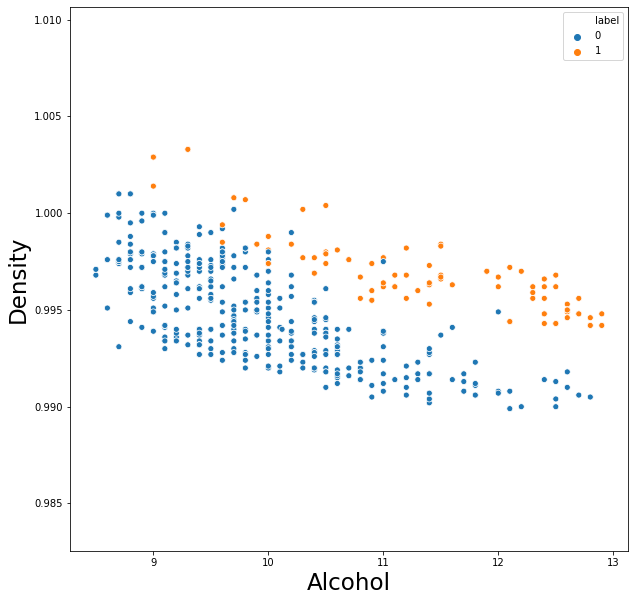

In [4]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='alcohol', y='density', data=wine, hue='label')
plt.xlabel('Alcohol', fontsize=23)
plt.ylabel('Density', fontsize=23)

# bisa kita lihat

# Data Splitting

In [5]:
X= wine[['density','alcohol']]
y= wine['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,random_state=2020)

# Model 1: tanpa polynomial

In [7]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = logreg.predict(X_test)
print('performance \n',classification_report(y_test,y_pred))

performance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



# Model 2: dengan polynomial
polynomial: garis regresinya ga lurus, bisa jadi kurva dll.

In [9]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
poly.fit(X_train)

X_train_poly= poly.transform(X_train)
X_test_poly= poly.transform(X_test)

In [10]:
# X_test_poly

In [11]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = logreg.predict(X_test_poly)
print('', classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



### Polynomial meningkatkan performance model ini untuk dataset wine, dilihat dari precision, recall, dan f1-score. 

### Jangan lihat accuracy, karena kalau lihat data mayoritas(kelas 0) dia pasti bagus, dan untuk data minoritas (kelas 1) nanti jelek.

# Resampling Method: Non Performing Loan

In [13]:
# !pip install imblearn

# atau anaconda powershell prompt, run as administrator

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [44]:
bankloan = pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [45]:
X = bankloan[['employ','debtinc','creddebt','othdebt']]
y = bankloan['default']

## EDA

In [46]:
bankloan['default'].value_counts()/bankloan.shape[0]*100

0    73.857143
1    26.142857
Name: default, dtype: float64

## Data Split

    train 60%
    val 20%
    test 20%

In [47]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X,
#     y,
#     stratify=y,
#     test_size=0.2,
#     random_state=1899
# )

# X_train, X_test, y_train, y_test = train_test_split(
#     X_train_val,
#     y_train_val,
#     stratify=y_train_val,
#     test_size=0.25,
#     random_state=1899
# )

In [48]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 1899)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, 
    random_state = 1899)


## Benchmark

In [49]:
model = LogisticRegression()
model.fit(X_train_val, y_train_val)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



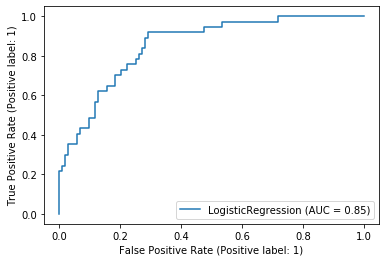

In [53]:
plot_roc_curve(model, X_test, y_test)

## Threshold Optimization

In [56]:
# model.predict_proba(X_test)

In [58]:
model.fit(X_train, y_train)

th_value = [i/100 for i in range(20,60)]
score=0
score_list=[]

for i in th_value:
    y_prob= model.predict_proba(X_val)[:,1]
    y_pred= np.where(y_prob>i, 1, 0)
    score_temp = f1_score(y_val, y_pred)
    score_list.append(score_temp)

    if score_temp>score:
        score = score_temp

        best_score = score
        best_th = i

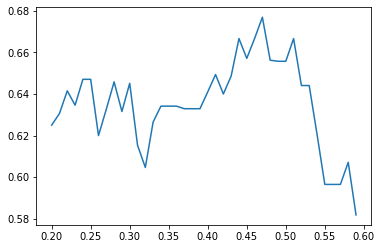

In [59]:
sns.lineplot(th_value, score_list)

In [65]:
print('best_th', best_th)
print('best_score', best_score)

best_th 0.47
best_score 0.676923076923077


In [62]:
model.fit(X_train_val, y_train_val)
y_prob = model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>best_th,1,0)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.62      0.43      0.51        37

    accuracy                           0.78       140
   macro avg       0.72      0.67      0.68       140
weighted avg       0.76      0.78      0.76       140



# Resampling: Undersampling 

random

In [76]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val) # undersampling the training set

In [77]:
# bisa coba method lain: 

In [78]:
model_under = LogisticRegression()
model_under.fit(X_under, y_under)

y_pred= model_under.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       103
           1       0.49      0.86      0.63        37

    accuracy                           0.73       140
   macro avg       0.71      0.77      0.71       140
weighted avg       0.82      0.73      0.74       140



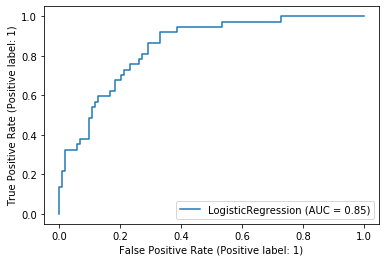

In [79]:
plot_roc_curve(model_under, X_test, y_test)

### f1 score (kelas 0) naik

## Penalized (algo based)

In [80]:
model_balanced = LogisticRegression(class_weight='balance') # penalized 'balance'
model_balanced.fit(X_train_val, y_train_val)

y_pred = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



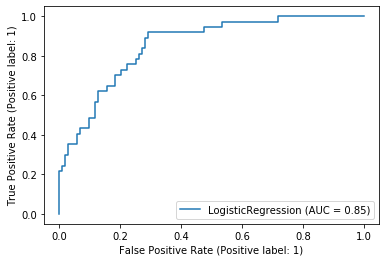

In [81]:
plot_roc_curve(model_balance, X_test, y_test)

## Summary

In [82]:
f1_no_tr = f1_score(y_test,model.predict(X_test))

y_prob_th = model.predict_proba(X_test)[:,1]
f1_no_tr_th = f1_score(y_test,np.where(y_prob_th > 0.47,1,0)) #ubah threshold di sini

f1_under = f1_score(y_test,model_under.predict(X_test))
f1_model = f1_score(y_test,model_balanced.predict(X_test))


In [83]:
score_list = [f1_no_tr, f1_no_tr_th, f1_under,f1_model] 
model_names = ['default','threshold optimization','random undersampling','algo based']
df_summary = pd.DataFrame({
    'method':model_names,
    'score':score_list
})
df_summary


,method,score
0,default,0.508475
1,threshold optimization,0.507937
2,random undersampling,0.627451
3,algo based,0.508475


# Combine Cross Val with Balanceing Method

In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [97]:
bankloan = pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [98]:
X = bankloan[['employ','debtinc','creddebt','othdebt']]
y = bankloan['default']

In [99]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 1899)

### menggunakan pipeline untuk menyederhanakan code kita

In [100]:
smote = SMOTE()
model = LogisticRegression()

estimator = Pipeline([('balancing', smote),('clf', model)])  

In [101]:
skf = StratifiedKFold(n_splits=5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv=skf, scoring='f1')

In [102]:
print('score', model_cv)
print('mean', model_cv.mean())
print('std', model_cv.std())

score [0.53164557 0.58666667 0.63636364 0.75       0.54285714]
mean 0.6095066031015397
std 0.07935470822793339


## Penalized

In [103]:
model = LogisticRegression(class_weight='balanced')
skf= StratifiedKFold(n_splits=5)
model_cv = (cross_val_score(model, X_train_val, y_train_val, cv=skf, scoring='f1'))

In [104]:
print('score', model_cv)
print('mean', model_cv.mean())
print('std', model_cv.std())

score [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
mean 0.6112109760593905
std 0.08162782517115562


# Combine Hyperparam Tuning dan Balancing

In [105]:
# make the algorithm chains
smote = SMOTE()
model =  LogisticRegression()
estimator = Pipeline([('balancing',smote),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20],
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)


In [106]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [108]:
print('best_score', grid_search.best_score_)
print('best_params', grid_search.best_params_)

best_score 0.6234219660725685
best_params {'balancing__k_neighbors': 20, 'clf__C': 0.01, 'clf__solver': 'liblinear'}


In [ ]:
# model performance before tuning

In [109]:
smote = SMOTE()
model = LogisticRegression()

estimator = Pipeline([('balancing', smote),('clf', model)])

estimator.fit(X_train_val, y_train_val)
y_pred = estimator.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       103
           1       0.55      0.92      0.69        37

    accuracy                           0.78       140
   macro avg       0.75      0.82      0.76       140
weighted avg       0.85      0.78      0.79       140



In [ ]:
# model performance after tuning

In [111]:
grid_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       103
           1       0.48      0.86      0.62        37

    accuracy                           0.71       140
   macro avg       0.70      0.76      0.69       140
weighted avg       0.81      0.71      0.73       140



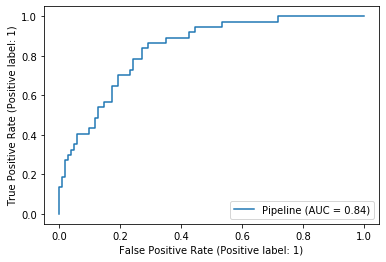

In [112]:
plot_roc_curve(grid_search.best_estimator_,X_test, y_test)

# TASK

Masih menggunakan Loan dataset, kombinasikan hyperparameter tuning cv dengan metode:

* Resampling: Undersampling
* Penalized